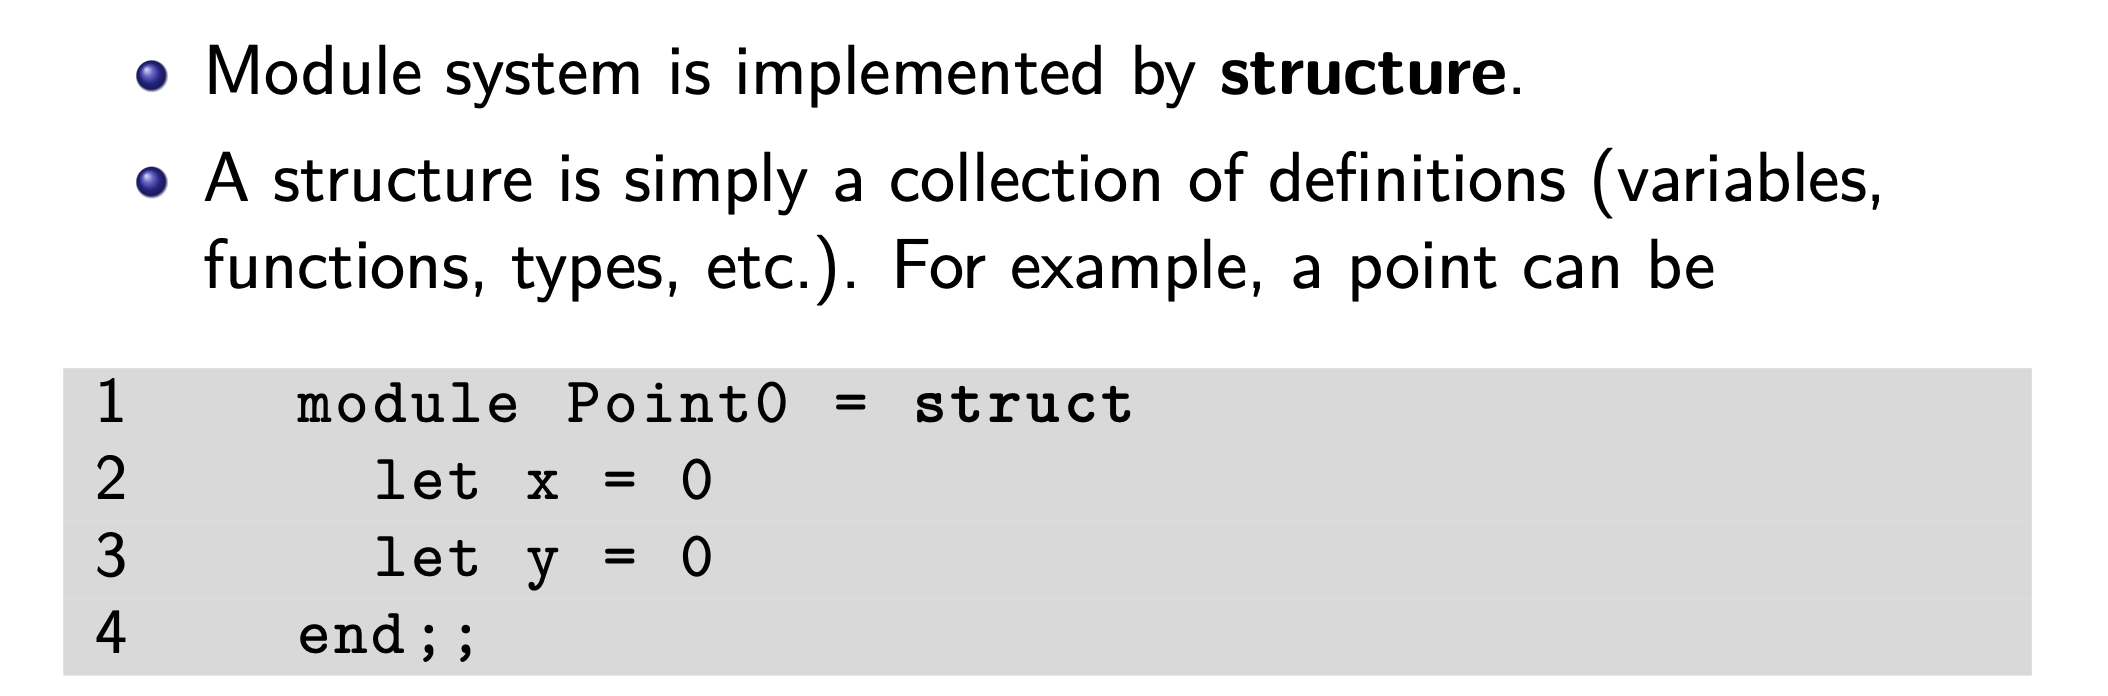

In [8]:
module Point0= struct 
  let x =0
  let y =0
end;;

module Point0 : sig val x : int val y : int end


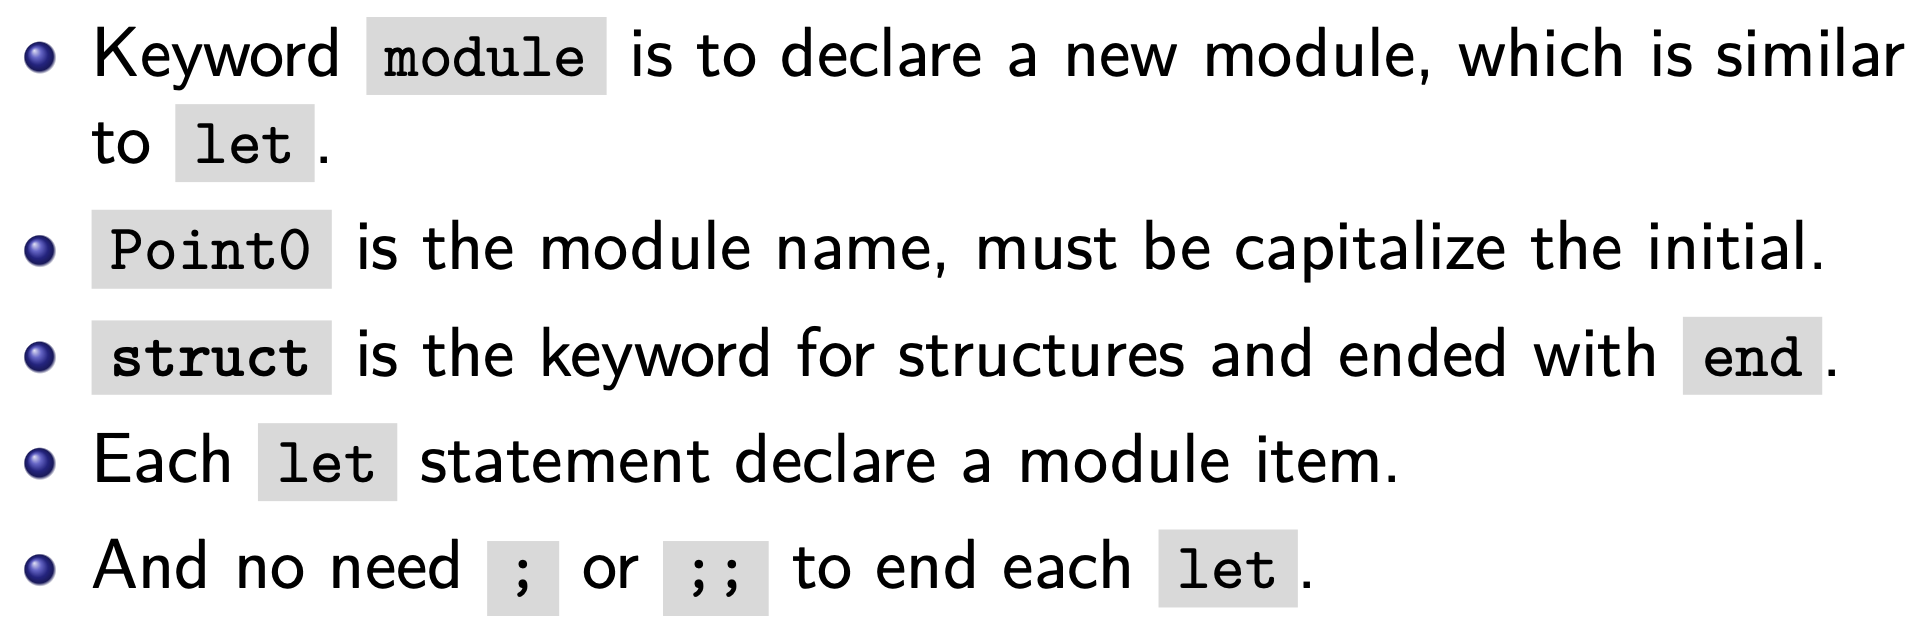

- Items of a structure can variables, functions, types, even modules.
- Let's try to define rectangles, such that
    - a rectangle is defined as two points;
    - a rectangle is one of two kinds: square or oblong (not square);
    - its area is calculated by area.

In [2]:
module Point1 = struct
  let x = 1
  let y = 1
end ;;

module Point1 : sig val x : int val y : int end


In [ ]:
module Rectangle1 = struct
  module PO = Point0
  module P1 = Point1
  type rec_kind = Square | Oblong
  let kind =
    if abs (PO.x - P1.x) = abs (PO.y - P1. y) then Square
    else Oblong
  let area = abs (PO.x - P1.x) * abs (PO.y - P1. y)
  end;;

module Rectangle1 :
  sig
    module PO = Point0
    module P1 = Point1
    type rec_kind = Square | Oblong
    val kind : rec_kind
    val area : int
  end


- Both PointO and Point are of the same type, which is a
signature

`sig val x : int val y : int end`

- Similar to other types, programmers can also define their own signatures.

- Declaring a signature is in fact abstracting structures.

In [ ]:
module type Point = sig
  val x : int
  val y : int
end;;

module type Point = sig val x : int val y : int end


- Then, we can declare Pointo and Point of type Point.
- And we can do the same thing for Rectangle.
- Some students may think "singatures in OCaml are classes in Java" and "structures in OCaml are objects in Java".
- For example, Point is a class while PO is an instance.
- This saying looks OK so far, but not correct in fact.
- Modules are more basic than classes.
- The next example will show the difference.

In [2]:
module type ListStack = sig
  val empty : 'a list
  exception EmptyStack
  val push : 'a list -> 'a -> 'a list
  val peek : 'a list -> 'a
  val pop : 'a list -> 'a list
end;;

module type ListStack =
  sig
    val empty : 'a list
    exception EmptyStack
    val push : 'a list -> 'a -> 'a list
    val peek : 'a list -> 'a
    val pop : 'a list -> 'a list
  end


In [12]:
module S1: ListStack = struct
  let empty = []
  exception EmptyStack
  let push s v = v :: s
  let peek = function
    | [] -> raise EmptyStack
    | h:: _ -> h
  let pop = function
    | [] -> raise EmptyStack
    | _::t -> t
  end;;

let st = S1.empty;;

S1.push st 1;;

(* S1.pop st;; *)

(* let st1 = [1]
let st2 = S1.push st1 2;;
let e = S1.pop st2;;  *)

module S1 : ListStack


val st : 'a list = []


- : int list = [1]


- This implementation has several limitations.
   - empty is the only item to store some data. However, it is declared as [ ] and immutable. Thus, programmers cannot push elements as S1. empty = S1. push S1. empty 1.
   - Furthermore, an existing nonempty list cannot be popped.

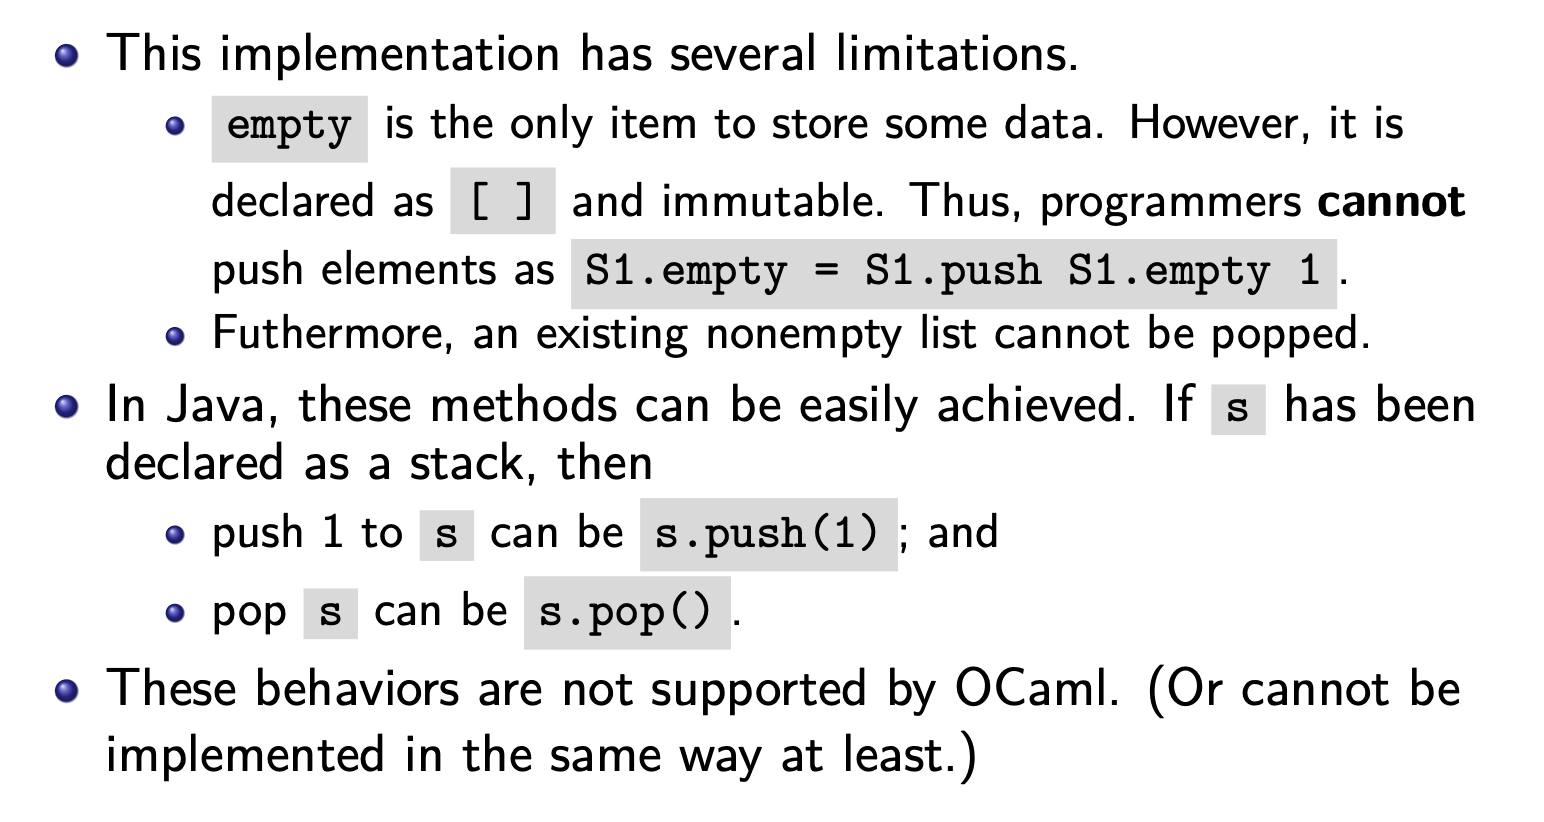

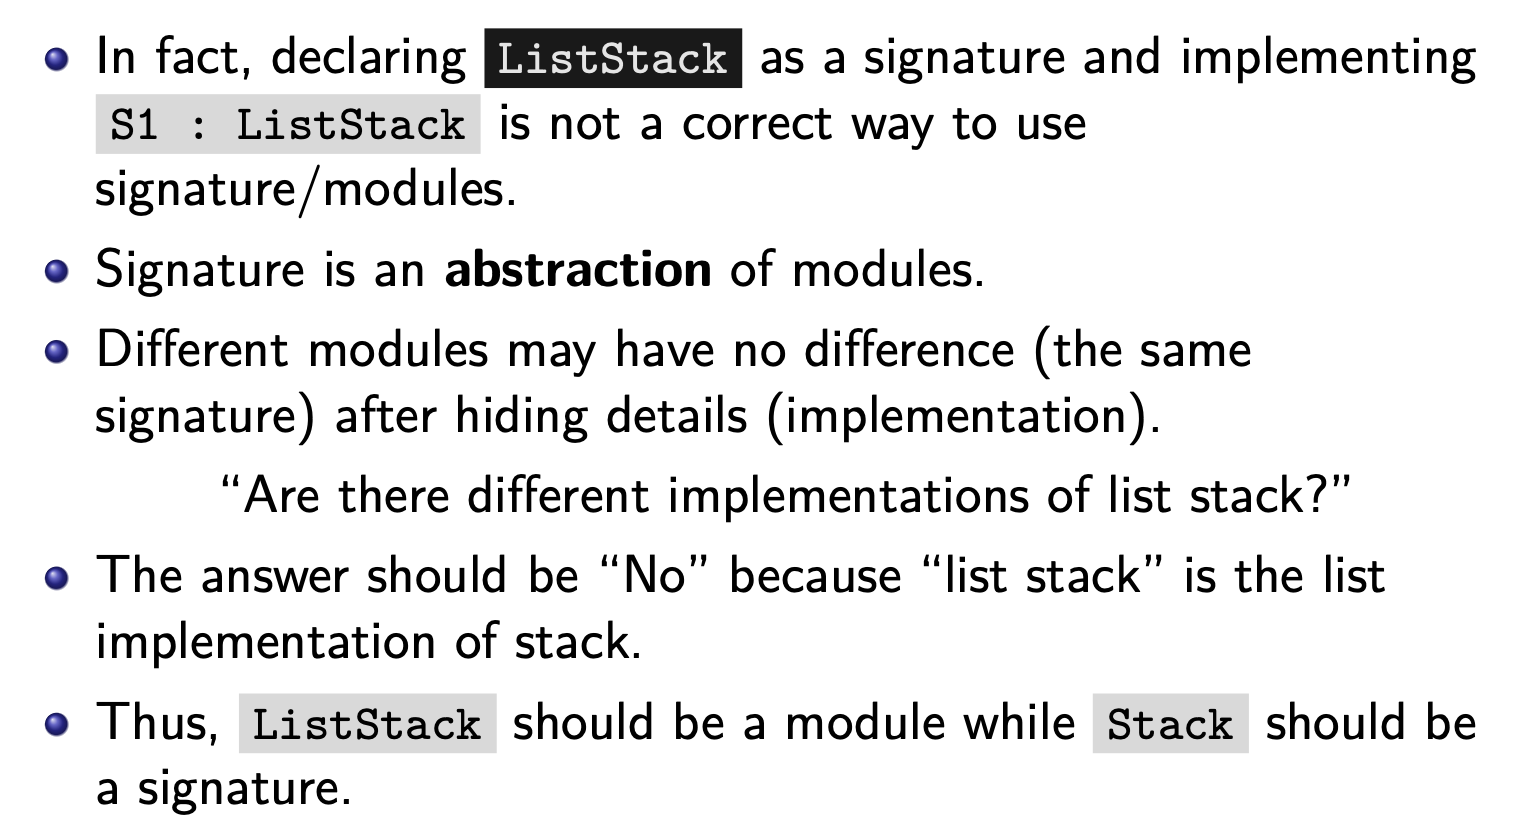

In [14]:
module LstStack = struct
  type 'a content = {mutable top: 'a list}
  let empty : 'a content = {top = []};;
  exception Empty
  let push (c: 'a content) v =
    match c.top with
    | [] -> c.top <- [v]
    | _ -> c.top <- v :: c.top
  let pop (c: 'a content) =
    match c.top with
    | [] -> raise Empty
    | h :: t -> c.top <- t; h
end;;

let stack1 = LstStack.empty;;
LstStack.push stack1 1;;
stack1;;
LstStack.push stack1 2;;
stack1;;
let x = LstStack.pop stack1;;
stack1;;

module LstStack :
  sig
    type 'a content = { mutable top : 'a list; }
    val empty : '_a content
    exception Empty
    val push : 'a content -> 'a -> unit
    val pop : 'a content -> 'a
  end


val stack1 : '_a LstStack.content = {LstStack.top = []}


- : unit = ()


- : int LstStack.content = {LstStack.top = [1]}


- : unit = ()


- : int LstStack.content = {LstStack.top = [2; 1]}


val x : int = 2


- : int LstStack.content = {LstStack.top = [1]}


## Identity (单位元)

$\forall a, a \circ id = id \circ a = a$


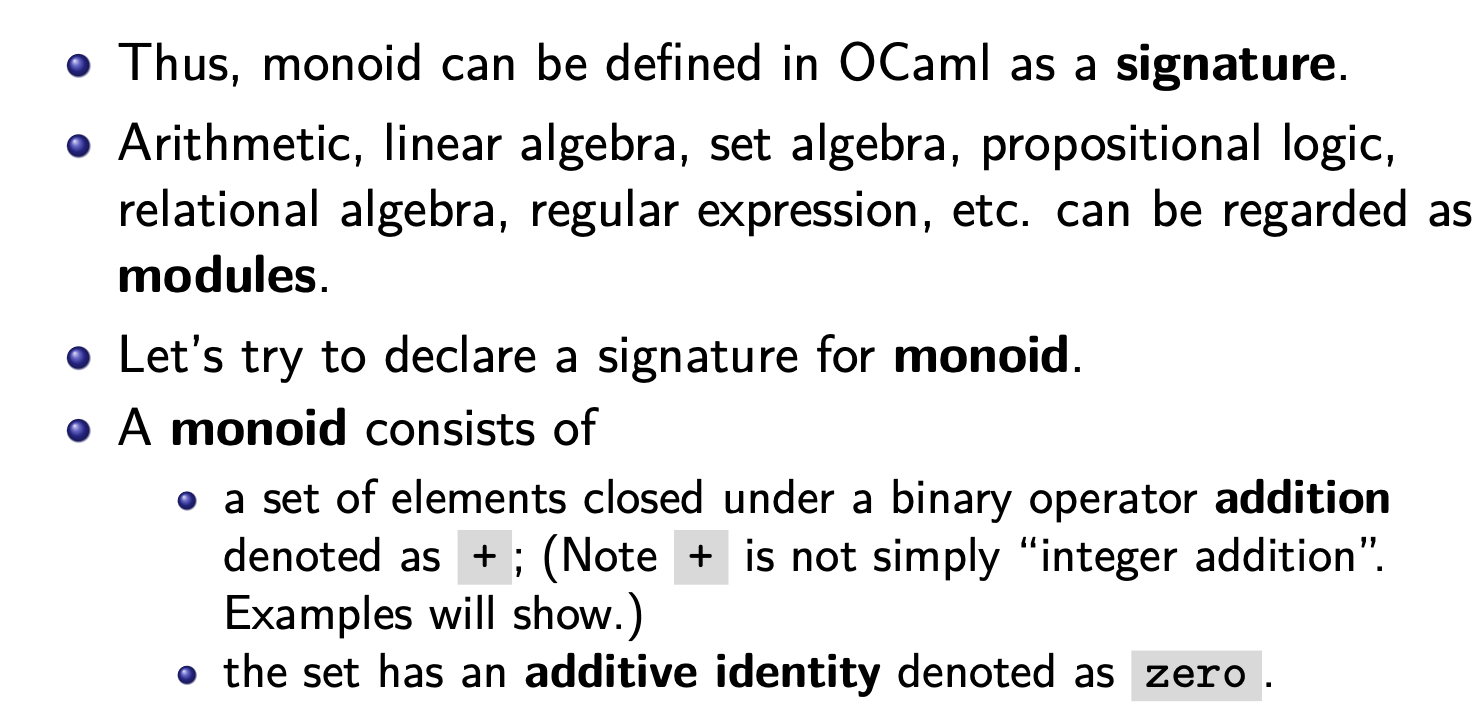

In [19]:
module type Monoid = sig
  type element
  val zero: element
  val ( + ) : element -> element -> element
  val print : element -> unit
end;;

module type Monoid =
  sig
    type element
    val zero : element
    val ( + ) : element -> element -> element
    val print : element -> unit
  end


In [25]:

module IntMonoid : Monoid = struct
  type element = int
  let zero = 0
  let ( + ) = ( + )
  let print = print_int
end;;

module FloatMonoid : Monoid = struct
  type element = float
  let zero = 0.
  let ( + ) = (  +. )
  let print = print_float
end;;

module BoolMonoidDisjunct : Monoid = struct
  type element = bool
  let zero = false
  let ( + ) = ( || )
  let print = function
    | true -> print_string "True"
    | _ -> print_string "False"
end;;

module BoolMonoidConjunct : Monoid = struct
  type element = bool
  let zero = true
  let ( + ) = ( && )
  let print = function
  | true -> print_string "True"
  | _ -> print_string "False"
end;;


module IntMonoidMult : Monoid = struct
  type element = int
  let zero = 1
  let ( + ) = ( * )
  let print = print_int
end;;


module IntMonoid : Monoid


module FloatMonoid : Monoid


module BoolMonoidDisjunct : Monoid


module BoolMonoidConjunct : Monoid


module IntMonoidMult : Monoid


In [27]:
module IntMonoid : Monoid with type element = int
  =  struct
  type element = int
  let zero = 0
  let ( + ) = ( + )
  let print = print_int
end ;;  

IntMonoid.zero+1;;
IntMonoid.(zero+1);;

module IntMonoid :
  sig
    type element = int
    val zero : element
    val ( + ) : element -> element -> element
    val print : element -> unit
  end


- : int = 1


- : IntMonoid.element = 1


In [29]:
type peano = O | Cons of unit * peano;;

module PeanoMonoid : 
  Monoid with type element = peano  = struct
  type element = peano
  let zero = O
  let suc x = Cons ((), x) 
  let rec ( + ) a = function
  | O -> a
  | Cons ((), t) -> suc (a + t)
  let rec print = function
  | O -> print_endline "O"
  | Cons ((), t)  -> print_string "S ";print t
end;;

(* let one = PeanoMonoid.( suc zero );; *)
(* PeanoMonoid contains a helper function suc which is not exposed in the signature. This is called opacity. *)

type peano = O | Cons of unit * peano


module PeanoMonoid :
  sig
    type element = peano
    val zero : element
    val ( + ) : element -> element -> element
    val print : element -> unit
  end


In [30]:
module type Stack = sig
  type 'a element
  type 'a stack
  exception Empty
  val empty : 'a stack
  val push : 'a stack -> 'a element -> 'a stack
  val pop : 'a stack -> 'a stack
  val peek : 'a stack -> 'a element
end;;

module type Stack =
  sig
    type 'a element
    type 'a stack
    exception Empty
    val empty : 'a stack
    val push : 'a stack -> 'a element -> 'a stack
    val pop : 'a stack -> 'a stack
    val peek : 'a stack -> 'a element
  end


In [ ]:
module AfaListStack : 
  Stack with type 'a element = 'a and type 'a stack = 'a list = struct
    type 'a element = 'a
    type 'a stack = 'a list
    exception Empty
    let empty = []
    let push s e = e :: s
    let pop = function
    | [] -> raise Empty
    | h :: t -> t
    let peek = function
    | [] -> raise Empty
    | h :: t -> h
end;;

let st =AfaListStack.empty;;
AfaListStack.push st 1;;

module AfaListStack :
  sig
    type 'a element = 'a
    type 'a stack = 'a list
    exception Empty
    val empty : 'a stack
    val push : 'a stack -> 'a element -> 'a stack
    val pop : 'a stack -> 'a stack
    val peek : 'a stack -> 'a element
  end


val st : 'a AfaListStack.stack = []


- : int AfaListStack.stack = [1]


- : 'a AfaListStack.stack = []


# Functor
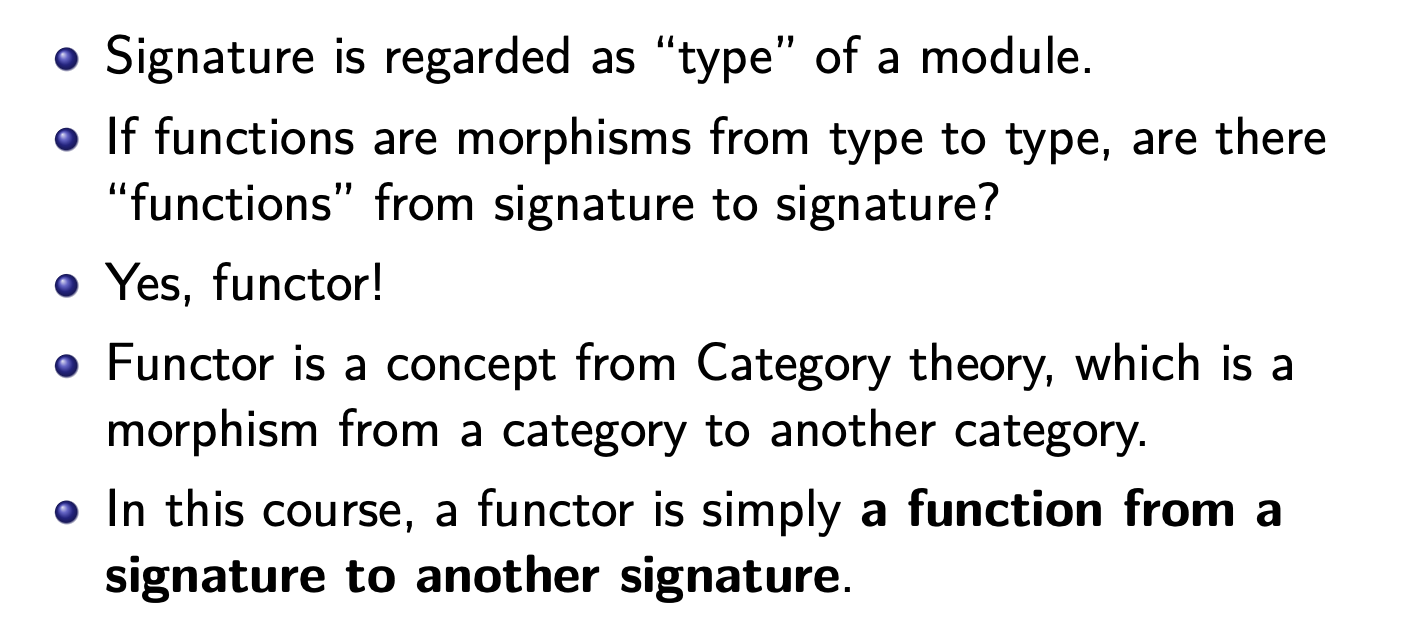


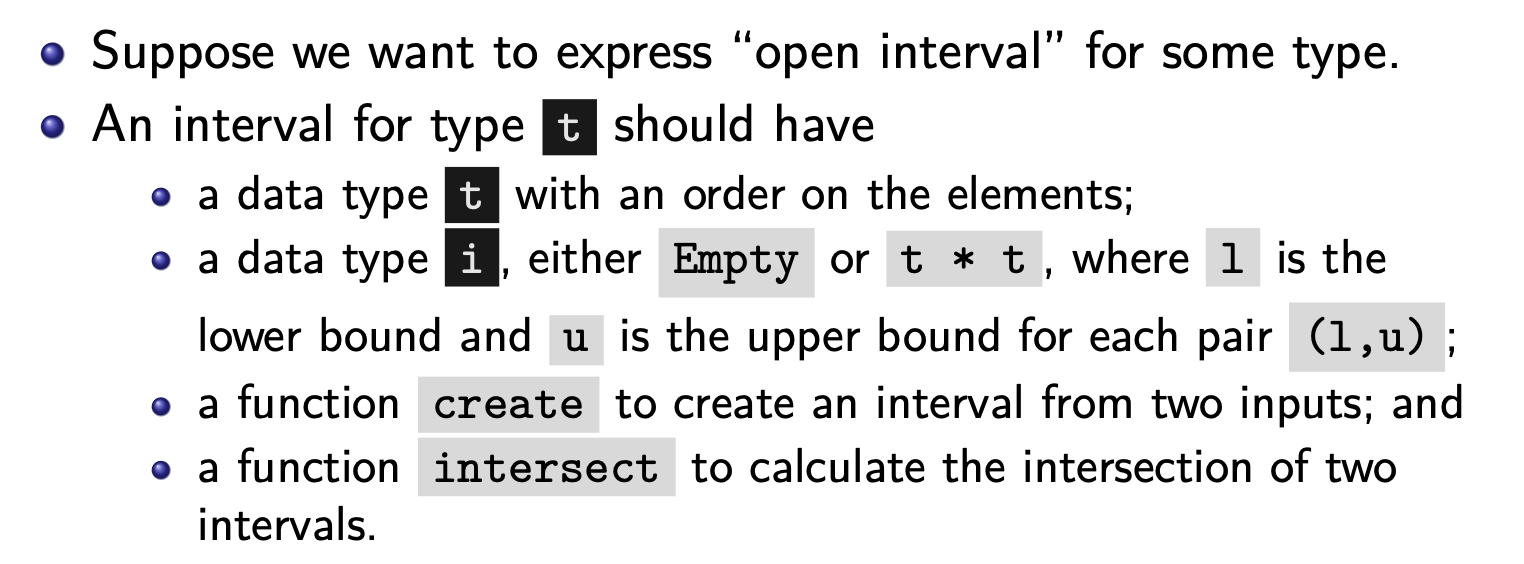

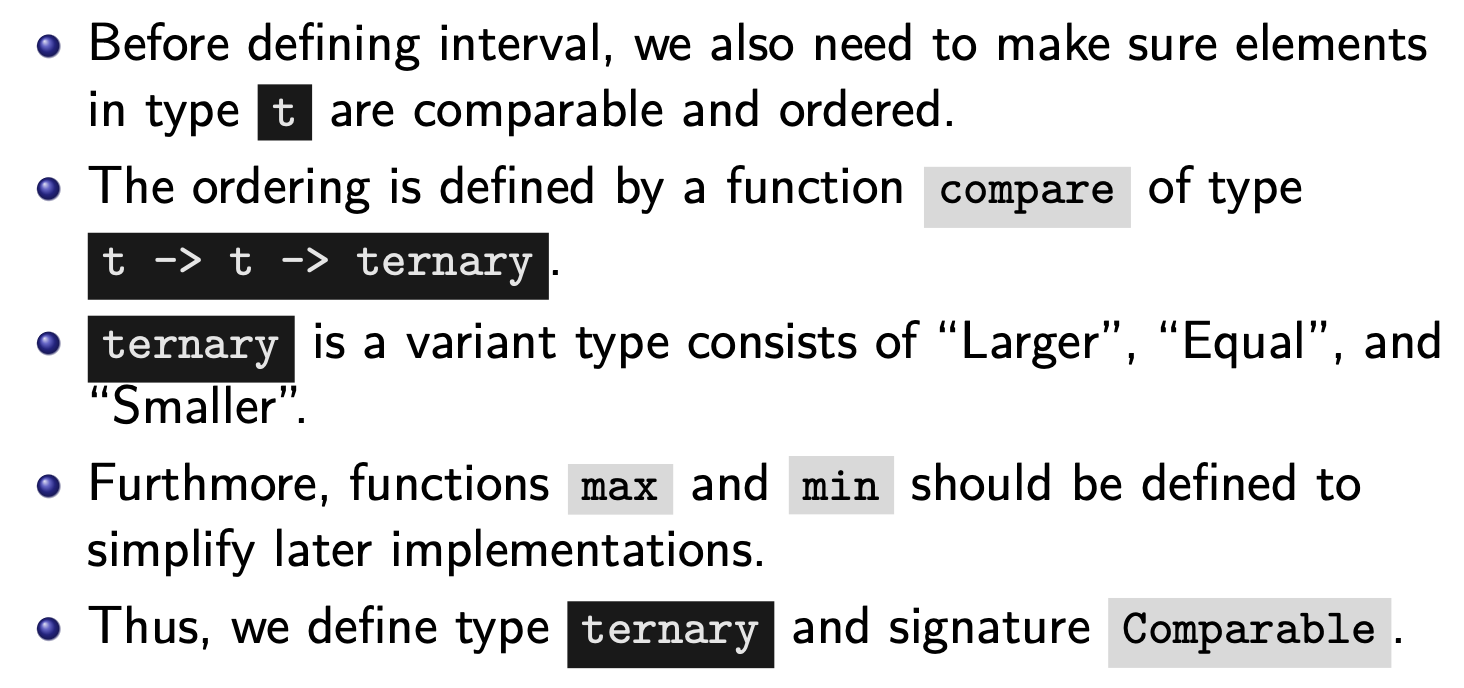

In [34]:
type ternary = Larger | Equal | Smaller;;

module type Comparable = sig
  type t
  val compare : t -> t -> ternary
  val max: t -> t -> t
  val min: t -> t -> t
end;;

module Int_Comparable : 
  Comparable with type t = int = struct
  type t = int
    let compare a b = 
      if a > b then Larger
      else if a = b then Equal
      else Smaller
    let max a b = if a > b then a else b
    let min a b = if a < b then a else b
end;;

type ternary = Larger | Equal | Smaller


module type Comparable =
  sig
    type t
    val compare : t -> t -> ternary
    val max : t -> t -> t
    val min : t -> t -> t
  end


module Int_Comparable :
  sig
    type t = int
    val compare : t -> t -> ternary
    val max : t -> t -> t
    val min : t -> t -> t
  end


In [35]:
module Make_Itvl (Bound : Comparable) = struct
  type i = Empty | Itvl of Bound.t * Bound.t
  let create a b =
    match Bound.compare a b with
    | Equal -> Empty
    | Larger -> Itvl (b, a)
    | Smaller -> Itvl (a, b)
  let intersect t1 t2 =
    match t1,t2 with
      | Itvl (l1, u1), Itvl (l2, u2) -> 
        if not (Bound.compare u1 l2 = Larger) || not (Bound.compare u2 l1 = Larger) then  Empty
        else create (max l1 l2) (min u1 u2) 
      | _ -> Empty
end;;

module Make_Itvl :
  functor (Bound : Comparable) ->
    sig
      type i = Empty | Itvl of Bound.t * Bound.t
      val create : Bound.t -> Bound.t -> i
      val intersect : i -> i -> i
    end


In [36]:
module Int_Itvl = Make_Itvl(Int_Comparable);;

module Int_Itvl :
  sig
    type i =
      Make_Itvl(Int_Comparable).i =
        Empty
      | Itvl of Int_Comparable.t * Int_Comparable.t
    val create : Int_Comparable.t -> Int_Comparable.t -> i
    val intersect : i -> i -> i
  end


In [37]:
module Int_Itvl = Make_Itvl (struct
  type t = int
  let compare = Int_Comparable.compare
  let max = Int_Comparable.max
  let min = Int_Comparable.min
end);;

module Int_Itvl :
  sig
    type i = Empty | Itvl of int * int
    val create : int -> int -> i
    val intersect : i -> i -> i
  end
